In [1]:
import pandas as pd

with open("Productivity_Experiment_Results_one_row.csv") as f:
    df = pd.read_csv(f)

In [2]:
with open("Productivity_Experiment_Results.csv") as f:
    all_results = pd.read_csv(f)

In [4]:
all_results["Task 1 Time buckets"] = pd.cut(all_results["Task 1 Time"], bins=[0,4,8,12,16], labels=["0-4", "4-8", "8-12", ">12"])
all_results["Task 2 Time buckets"] = pd.cut(all_results["Task 2 Time"], bins=[0,4,8,12,16], labels=["0-4", "4-8", "8-12", ">12"])

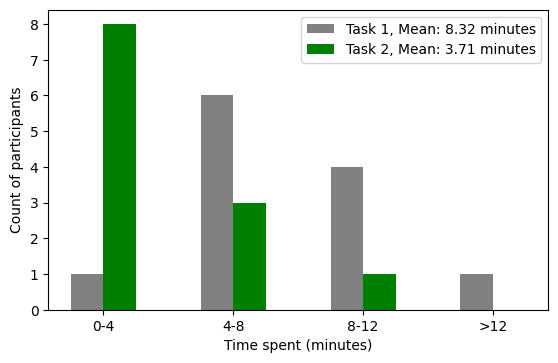

In [5]:
# plot Task 1 and Task 2 time buckets in a bar chart same plot
import matplotlib.pyplot as plt
import numpy as np
X = np.arange(4)
fig = plt.figure(figsize=(5,3))
ax = fig.add_axes([0,0,1,1])
ax.bar(X, all_results["Task 1 Time buckets"].value_counts().sort_index(), color = 'gray', width = 0.25, label="Task 1, Mean: " + str(round(all_results["Task 1 Time"].mean(), 2)) + " minutes")
ax.bar(X + 0.25, all_results["Task 2 Time buckets"].value_counts().sort_index(), color = 'g', width = 0.25, label="Task 2, Mean: " + str(round(all_results["Task 2 Time"].mean(), 2)) + " minutes")
ax.set_xticks(X + 0.125, ["0-4", "4-8", "8-12", ">12"])
ax.set_xlabel("Time spent (minutes)")
ax.set_ylabel("Count of participants")
ax.set_title("")
ax.legend()



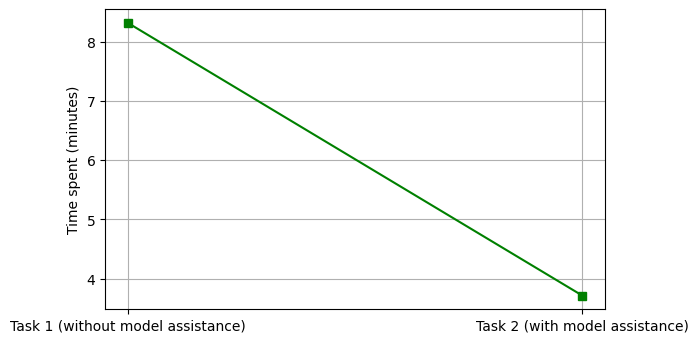

In [6]:
mean1 = all_results["Task 1 Time"].mean()
mean2 = all_results["Task 2 Time"].mean()

sd1 = all_results["Task 1 Time"].std()
sd2 = all_results["Task 2 Time"].std()

# plot mean and std of Task 1 and Task 2 in linear lines
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(5,3))
ax = fig.add_axes([0,0,1,1])
X = np.arange(2)
ax.plot(X, [mean1, mean2], '-gs', label="Mean")
# plt.errorbar([0,1], [mean1, mean2],[sd1, sd2], linestyle='None', marker='^', color = 'green',  capsize=3)
ax.xaxis.set_ticks(np.arange(0, 2, 1), labels=["Task 1 (without model assistance)", "Task 2 (with model assistance)"])
ax.set_ylabel("Time spent (minutes)")
ax.plot()
plt.grid()
plt.show()

In [7]:
import json
with open("qasper_data.json", "r") as f:
    qasper_data = json.load(f)

task1_predicted_answers = []
task2_predicted_answers = []
for i, column in enumerate(df.columns):
    task = column.split("-")[0]
    q_name = column.split("-")[1].split("_")[0]
    q_ids = qasper_data[q_name]["q_ids"]
    predicted_answer = df[column][0]
    if task == "Task1":
        task1_predicted_answers.append({
            "question_id": q_ids[i%4],
            "predicted_answer": str(predicted_answer),
            "predicted_evidence": []
        })
    else:
        task2_predicted_answers.append({
            "question_id": q_ids[i%4],
            "predicted_answer": str(predicted_answer),
            "predicted_evidence": []
        })

In [8]:
with open("results/task1_predictions.jsonl", "w") as f:
    for prediction in task1_predicted_answers:
        f.write(json.dumps(prediction) + "\n")

In [10]:
!python ../qasper_evaluator.py --predictions results/task1_predictions.jsonl --gold ../data/qasper/qasper-test-v0.3.json --text_evidence_only

{
  "Answer F1": 0.4758944908287028,
  "Answer F1 by type": {
    "extractive": 0.5272334527032162,
    "abstractive": 0.20259319786812574,
    "boolean": 1.0,
    "none": 0.5
  },
  "Evidence F1": 0.22916666666666666,
  "Missing predictions": 1403
}


In [11]:
with open("results/task2_predictions.jsonl", "w") as f:
    for prediction in task2_predicted_answers:
        f.write(json.dumps(prediction) + "\n")

In [12]:
!python ../qasper_evaluator.py --predictions results/task2_predictions.jsonl --gold ../data/qasper/qasper-test-v0.3.json --text_evidence_only

{
  "Answer F1": 0.5895297925052142,
  "Answer F1 by type": {
    "extractive": 0.7019500718737308,
    "abstractive": 0.2293784675363623,
    "boolean": 1.0,
    "none": 0.2
  },
  "Evidence F1": 0.22916666666666666,
  "Missing predictions": 1403
}
